In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('A:\File path\python project')

In [24]:
train = pd.read_csv('train_new.csv')
test=pd.read_csv('test_new.csv')

In [25]:
len(test.columns)

36

In [26]:
test.default_ind.value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

In [27]:
test['default_ind']=test.default_ind.astype(int)

In [28]:
train['Source']='train'
test['Source']='test'

In [29]:
fulldata=pd.concat([train,test],axis=0,sort=False)

In [30]:
fulldata.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind', 'Source'],
      dtype='object')

In [31]:
fulldata.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
total_pymnt                   float64
total_rec_int                 float64
total_rec_late_fee              int64
recoveries                      int64
last_pymnt_d

In [32]:
fulldata['default_ind']=fulldata['default_ind'].astype(str)
fulldata['acc_now_delinq']=fulldata['acc_now_delinq'].astype(str)

In [33]:
fulldata.inq_last_6mths=fulldata.inq_last_6mths.astype(str)

In [34]:
fulldata.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                 object
open_acc                        int64
pub_rec                         int64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
total_pymnt                   float64
total_rec_int                 float64
total_rec_late_fee              int64
recoveries                      int64
last_pymnt_d

In [35]:
fulldata.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
issue_d                103
pymnt_plan               2
purpose                 14
addr_state              51
inq_last_6mths           9
initial_list_status      2
last_pymnt_d            97
last_credit_pull_d     102
application_type         2
acc_now_delinq           8
default_ind              2
Source                   2
dtype: int64

# imputation

In [36]:
def impute(df,train):
    for i in range(len(df.columns)):
        if(df.iloc[:,i].dtype==object):
            if(df.iloc[:,i].isnull().sum()>0):
                df.iloc[:,i].fillna(train.iloc[:,i].mode()[0], inplace=True)
        else:
            df.iloc[:,i].fillna(train.iloc[:,i].median(), inplace=True)
    return df

In [37]:
fulldata.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

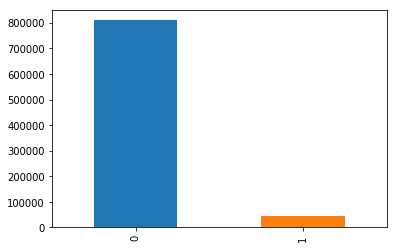

In [38]:
fulldata.default_ind.value_counts().plot.bar()

In [39]:
from datetime import datetime

In [40]:
fulldata=fulldata.drop('issue_d',axis=1)

In [41]:
fulldata.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                 object
open_acc                        int64
pub_rec                         int64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
total_pymnt                   float64
total_rec_int                 float64
total_rec_late_fee              int64
recoveries                      int64
last_pymnt_d                   object
last_pymnt_a

In [42]:
fulldata.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
pymnt_plan               2
purpose                 14
addr_state              51
inq_last_6mths           9
initial_list_status      2
last_pymnt_d            97
last_credit_pull_d     102
application_type         2
acc_now_delinq           8
default_ind              2
Source                   2
dtype: int64

In [43]:
fulldata.addr_state.unique()

array(['MA', 'WI', 'ME', 'FL', 'NY', 'GA', 'CO', 'VA', 'IN', 'NC', 'MD',
       'CT', 'CA', 'WA', 'NJ', 'NE', 'AZ', 'NM', 'OH', 'LA', 'AL', 'TN',
       'KS', 'SC', 'UT', 'MO', 'DE', 'TX', 'SD', 'NH', 'IL', 'KY', 'WY',
       'AR', 'VT', 'NV', 'MN', 'PA', 'RI', 'OR', 'MI', 'IA', 'DC', 'ID',
       'HI', 'MS', 'AK', 'OK', 'MT', 'WV', 'ND'], dtype=object)

In [44]:
fulldata.addr_state.dtype

dtype('O')

In [45]:
fulldata.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_d                   8862
last_pymnt_amnt                   0
last_credit_pull_d          

In [46]:
fulldata.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_d                   8862
last_pymnt_amnt                   0
last_credit_pull_d          

In [47]:
fulldata1=fulldata[['last_credit_pull_d','last_pymnt_d','revol_util','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','collections_12_mths_ex_med','emp_length']]

In [48]:
fulldata1.dtypes

last_credit_pull_d             object
last_pymnt_d                   object
revol_util                    float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_rev_hi_lim              float64
collections_12_mths_ex_med    float64
emp_length                     object
dtype: object

In [49]:
train1=train[['last_credit_pull_d','last_pymnt_d','revol_util','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','collections_12_mths_ex_med','emp_length']]

In [50]:
train1.dtypes

last_credit_pull_d             object
last_pymnt_d                   object
revol_util                    float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_rev_hi_lim              float64
collections_12_mths_ex_med    float64
emp_length                     object
dtype: object

In [51]:
fulldata1=impute(fulldata1,train1)

In [52]:
list1=['last_credit_pull_d','last_pymnt_d','revol_util','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','collections_12_mths_ex_med','emp_length']

In [53]:
fulldata3=fulldata.drop(list1,axis=1)

In [54]:
fulldata3=pd.concat([fulldata3,fulldata1],axis=1)

In [55]:
fulldata3.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
last_pymnt_amnt               0
application_type              0
acc_now_delinq                0
default_ind                   0
Source                        0
last_credit_pull_d            0
last_pymnt_d                  0
revol_util                    0
tot_coll

In [56]:
fulldata3.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,default_ind,Source,last_credit_pull_d,last_pymnt_d,revol_util,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,collections_12_mths_ex_med,emp_length
0,7500,36 months,13.75,E,E2,OWN,22000.0,Not Verified,n,debt_consolidation,...,0,train,Jun-10,Jun-10,51.5,0.0,80986.0,23200.0,0.0,< 1 year
1,3500,36 months,10.28,C,C1,RENT,20000.0,Not Verified,n,moving,...,0,train,Aug-10,Sep-10,32.4,0.0,80986.0,23200.0,0.0,< 1 year
2,5750,36 months,7.43,A,A2,MORTGAGE,125000.0,Not Verified,n,debt_consolidation,...,0,train,Apr-10,May-10,10.2,0.0,80986.0,23200.0,0.0,10+ years
3,5000,36 months,7.43,A,A2,RENT,40000.0,Not Verified,n,car,...,0,train,Nov-13,Aug-10,14.0,0.0,80986.0,23200.0,0.0,6 years
4,1200,36 months,11.54,C,C5,RENT,20000.0,Not Verified,n,credit_card,...,0,train,Jul-10,Jul-10,75.8,0.0,80986.0,23200.0,0.0,< 1 year


In [57]:
fulldata3.emp_length.unique()

array(['< 1 year', '10+ years', '6 years', '3 years', '1 year', '8 years',
       '7 years', '2 years', '4 years', '5 years', '9 years'],
      dtype=object)

In [58]:
fulldata3.emp_length=np.where(fulldata3.emp_length=='< 1 year','less than 1 year',fulldata3.emp_length)
fulldata3.emp_length=np.where(fulldata3.emp_length=='10+ years','10 plus year',fulldata3.emp_length)

In [59]:
fulldata3.term=np.where(fulldata3.term==' 36 months','36','60')

In [60]:
fulldata3.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                 object
open_acc                        int64
pub_rec                         int64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
total_pymnt                   float64
total_rec_int                 float64
total_rec_late_fee              int64
recoveries                      int64
last_pymnt_amnt               float64
application_type               object
acc_now_delinq                 object
default_ind 

In [61]:
fulldata3.Source.unique()

array(['train', 'test'], dtype=object)

In [62]:
train_f=fulldata3[fulldata3.Source=='train']

In [63]:
train_f.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,default_ind,Source,last_credit_pull_d,last_pymnt_d,revol_util,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,collections_12_mths_ex_med,emp_length
0,7500,36,13.75,E,E2,OWN,22000.0,Not Verified,n,debt_consolidation,...,0,train,Jun-10,Jun-10,51.5,0.0,80986.0,23200.0,0.0,less than 1 year
1,3500,36,10.28,C,C1,RENT,20000.0,Not Verified,n,moving,...,0,train,Aug-10,Sep-10,32.4,0.0,80986.0,23200.0,0.0,less than 1 year
2,5750,36,7.43,A,A2,MORTGAGE,125000.0,Not Verified,n,debt_consolidation,...,0,train,Apr-10,May-10,10.2,0.0,80986.0,23200.0,0.0,10 plus year
3,5000,36,7.43,A,A2,RENT,40000.0,Not Verified,n,car,...,0,train,Nov-13,Aug-10,14.0,0.0,80986.0,23200.0,0.0,6 years
4,1200,36,11.54,C,C5,RENT,20000.0,Not Verified,n,credit_card,...,0,train,Jul-10,Jul-10,75.8,0.0,80986.0,23200.0,0.0,less than 1 year


In [64]:
test_f=fulldata3[fulldata3.Source=='test']

In [65]:
train_f.default_ind.value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [66]:
test_f.default_ind.value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

In [67]:
train_f.default_ind.head()

0    0
1    0
2    0
3    0
4    0
Name: default_ind, dtype: object

In [68]:
fulldata3.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

# stratified sampling

In [69]:
train_f.default_ind.value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [70]:
count_1=train_f.default_ind.value_counts()[1]

In [71]:
count_t=int(5*count_1)

In [72]:
count_t

230780

In [73]:
count_0=int(.8*count_t)

In [74]:
count_0

184624

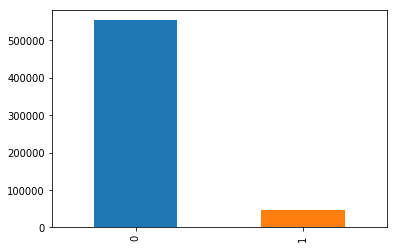

In [75]:
train_f.default_ind.value_counts().plot.bar()

In [76]:
train_class_0 = train_f[train_f['default_ind'] == '0']
train_class_1 = train_f[train_f['default_ind'] == '1']

In [77]:
train_class_0_strat = train_class_0.sample(count_0, replace=True)

In [78]:
len(train_class_0_strat)

184624

In [79]:
train_class_0_strat.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,default_ind,Source,last_credit_pull_d,last_pymnt_d,revol_util,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,collections_12_mths_ex_med,emp_length
389057,16000,36,7.69,A,A4,MORTGAGE,70000.0,Source Verified,n,credit_card,...,0,train,Jan-16,Dec-15,37.4,170.0,307771.0,22100.0,0.0,10 plus year
271327,8100,36,7.90,A,A4,RENT,105000.0,Not Verified,n,debt_consolidation,...,0,train,Jan-16,Dec-15,41.1,0.0,105703.0,101400.0,0.0,10 plus year
390919,25000,36,7.12,A,A3,MORTGAGE,118000.0,Verified,n,debt_consolidation,...,0,train,Jan-16,Dec-15,45.9,0.0,467473.0,379000.0,0.0,10 plus year
529405,20000,36,14.65,C,C5,MORTGAGE,107500.0,Verified,n,home_improvement,...,0,train,Jan-16,Jan-16,97.4,0.0,506918.0,10300.0,0.0,6 years
477034,13725,60,15.59,D,D1,RENT,120000.0,Source Verified,n,debt_consolidation,...,0,train,Jan-16,Jan-16,46.7,0.0,46611.0,4300.0,0.0,less than 1 year


In [80]:
final_train_data=pd.concat([train_class_0_strat,train_class_1],axis=0)

In [81]:
final_train_data.default_ind.value_counts()

0    184624
1     46156
Name: default_ind, dtype: int64

In [82]:
final_test_data=test_f

In [83]:
final_train_data.to_csv('final_train_data.csv',index=False)
final_test_data.to_csv('final_test_data.csv',index=False)

In [84]:
final_train_data.default_ind.value_counts()

0    184624
1     46156
Name: default_ind, dtype: int64

In [85]:
final_test_data.default_ind.value_counts()

0    256680
1       311
Name: default_ind, dtype: int64